<i>Project 1: Natural Language Processing</i> | Dr. LaBrie | Winter 2020

<h1> DRUG REVIEW </h1>

This dataset presents patient reviews on specific drugs based on their related conditions and a rating score (in a scale 1 to 10) reflecting overall patient satisfaction.

The purpose of this project is to study sentiment analysis of drug experience over multiple features such as its effectiveness and side effects. The data is split into a train (75%) and a test (25%) partition.

The process proceeds in the order of <i> data exploration, data preparation, modeling, and evaluation. </i> The data exploration process will reveal data types through visualization/statistical methods. This approach allows me to set the topic, preprocess the data to fit the objective, and create various variables to fit model. 

Specifically I want to address the following questions:
1. What insights can we gain from exploring and visualizing our data?
2. How does sentiment play into rating and usefulness of reviews?
3. What machine learning models work the best for predicting the sentiment or rating based on review?
4. Can we create a way to help poeple to find the best medications to treat their illness?
5. What are the important features or words for predicting review rating?



In the modelling part, I will be using three machine learning algorithms: <b>Naive Bayes, Random Forest, LightGBM, XGBoost, and CatBoost </b>.  To sum up, a short conclusion will review the limitations and analysis of the project.

Data was obtained from UCI Machine Learning Repository.
(https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

### Contents <a id='C'></a>

<a href='#S1'><b>Step 1 - Preparing Libraries & Dataset</b></a>
<p style="margin-left: 20px">
    <a href='#IL'>Importing Libraries</a></br>
    <a href='#ID'>Importing Dataset</a></br>
</p>

<a href='#S2'><b>Step 2 - Data Exploration</b></a>
<p style="margin-left: 20px">
    <a href='#AD'>Analyzing Our Data</a></br>
    <a href='#VD'>Visualizing Our Data</a></br>
</p>

<a href='#S3'><b>Step 3 - Data Preparation</b></a>
<p style="margin-left: 20px">
    <a href='#RS'>Remove Stop Words</a></br>
    <a href='#FE'>Feature Engineering</a></br>
</p>

<a href='#S4'><b>Step 4 - Machine Learning Algorithms</b></a>
<p style="margin-left: 20px">
    <a href='#NB'>Naive Bayes</a></br>
    <a href='#RF'>Random Forest</a></br>
    <a href='#LGB'>LightGBM</a></br>
    <a href='#XGB'>XGBoost</a></br>
    <a href='#CB'>CatBoost</a></br>
    
</p>

<a href='#S5'><b>Step 5 - Evaluation</b></a>

### Step 1 - Preparing Libraries & Dataset <a id='S1'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Importing Libraries</u> <a id='AD'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tokenize 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#### <u>Importing Dataset</u> <a id='ID'></a>

In [3]:
train = pd.read_csv('drug_train.csv')
test = pd.read_csv('drug_test.csv')

In [4]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print("The shape of the train set given is: ", train.shape)
print("The shape of the test set given is: ", test.shape)

The shape of the train set given is:  (161297, 7)
The shape of the test set given is:  (53766, 7)


In [6]:
# Droping the data points with null values
train = train.dropna(how = 'any', axis = 0)
test = test.dropna(how = 'any', axis = 0)

In [7]:
print("The shape of the train set given is: ", train.shape)
print("The shape of the test set given is: ", test.shape)

The shape of the train set given is:  (160398, 7)
The shape of the test set given is:  (53471, 7)


In [8]:
# Merge the train and test data
merge = [train, test]
data = pd.concat(merge)
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


### Step 2 - Data Exploration <a id='S2'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Analyzing our Data</u> <a id='AD'></a>

In [9]:
data.shape

(213869, 7)

In [10]:
# Converts all uppercase characters in a string into lowercase characters
data.columns = data.columns.str.lower()

In [11]:
# Sorting dataframe
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)

In [12]:
# Dropping the null values
data['condition'].isnull().sum(axis=0)

0

In [13]:
data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [14]:
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4


In [15]:
# Find the index label corresponding to the minimum value in the given series object
data.at[data['usefulcount'].idxmin(),'drugname']

'Medroxyprogesterone'

In [16]:
# Find the number of rows/columns by label(s)
data.loc[data['rating'] == 0, :].shape

(0, 7)

In [17]:
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4


In [18]:
data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [19]:
# Converting the date in to date time format
data['date'] = pd.to_datetime(data['date'])

In [20]:
data.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7


#### <u>Visualizing our Data</u> <a id='VD'></a>

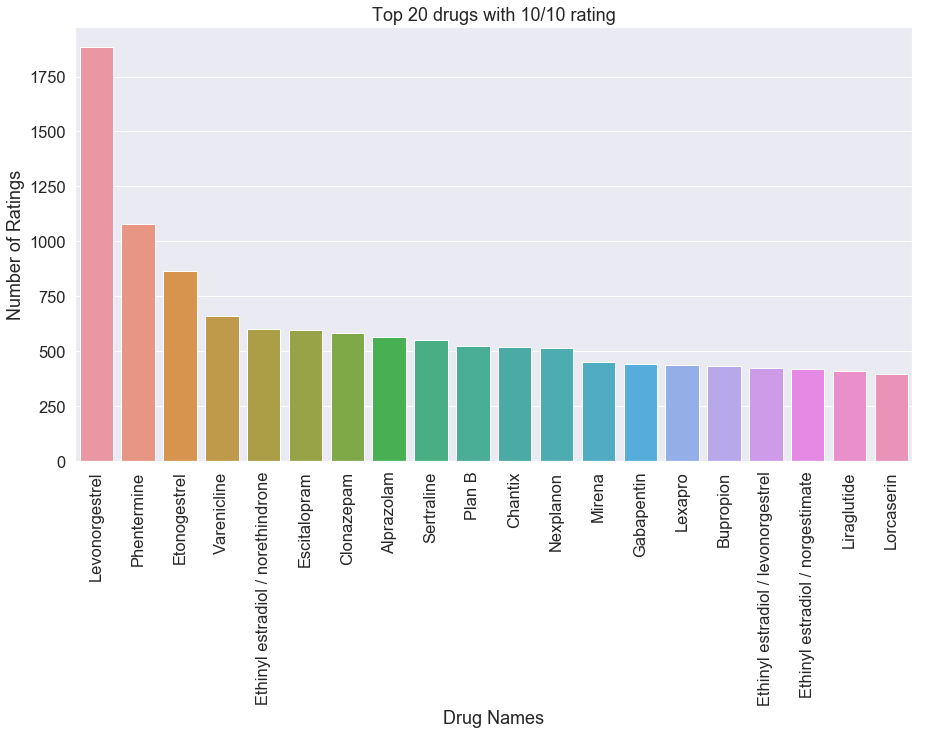

In [21]:
# Create barplot: Top 20 drugs with the 10/10 rating

# Setting the parameter
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, 'drugname'].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname [0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

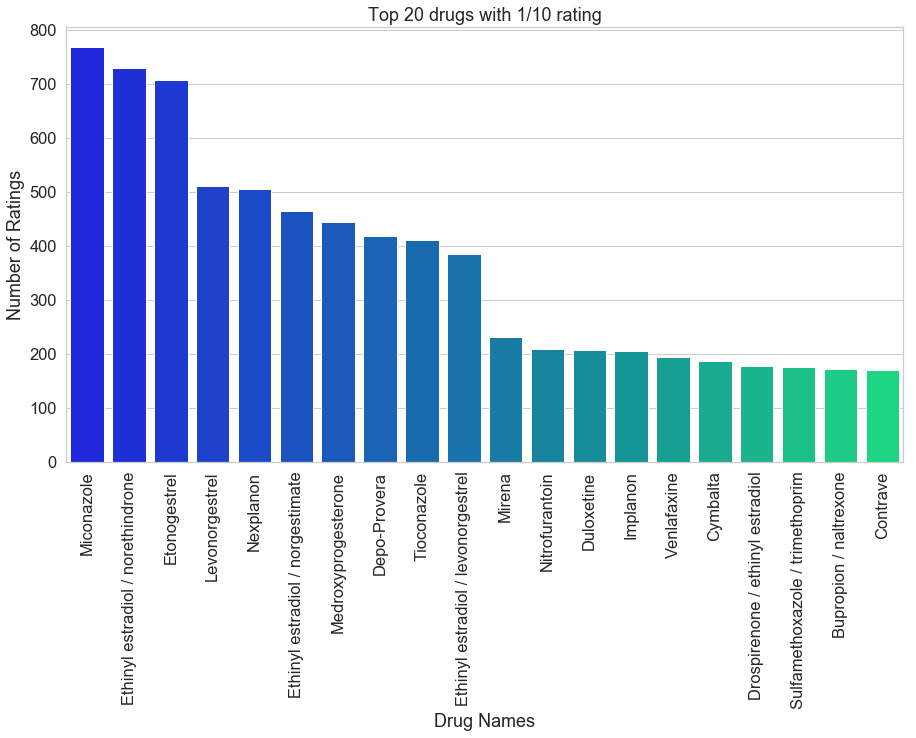

In [22]:
# Create barplot: Top 20 drugs with 1/10 rating

# Setting the parameter
sns.set(font_scale = 1.5, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

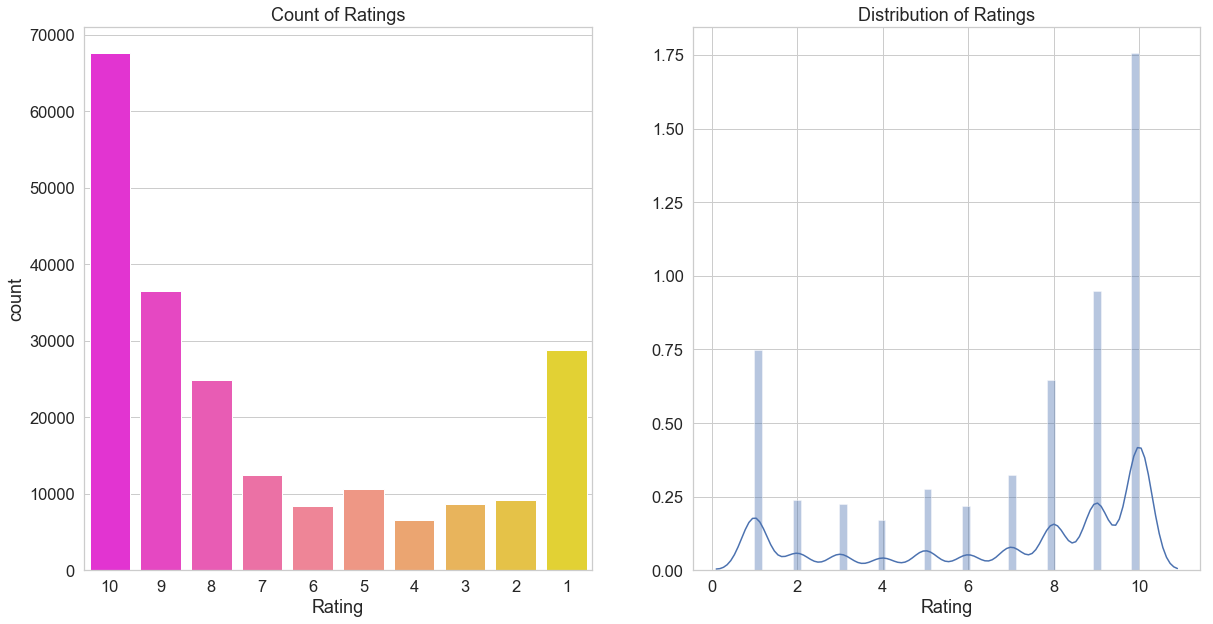

In [23]:
# Find distribution of the ratings
plt.rcParams['figure.figsize'] = [20,10]
sns.set(font_scale = 1.5, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)


sns_1 = sns.countplot(data['rating'], palette = 'spring', 
                      order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

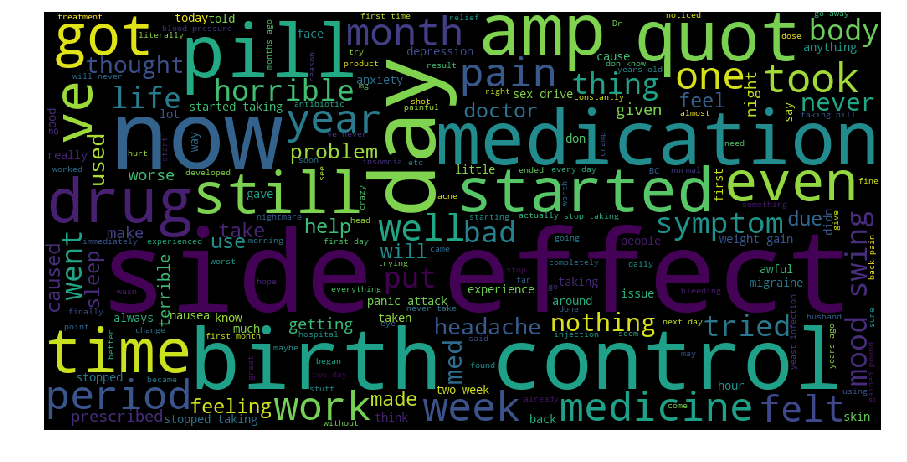

In [24]:
# Create Word Cloud of the reviews with rating equal to 1
rate_ten = data.loc[data.rating == 1, 'review']
k = (''.join(rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

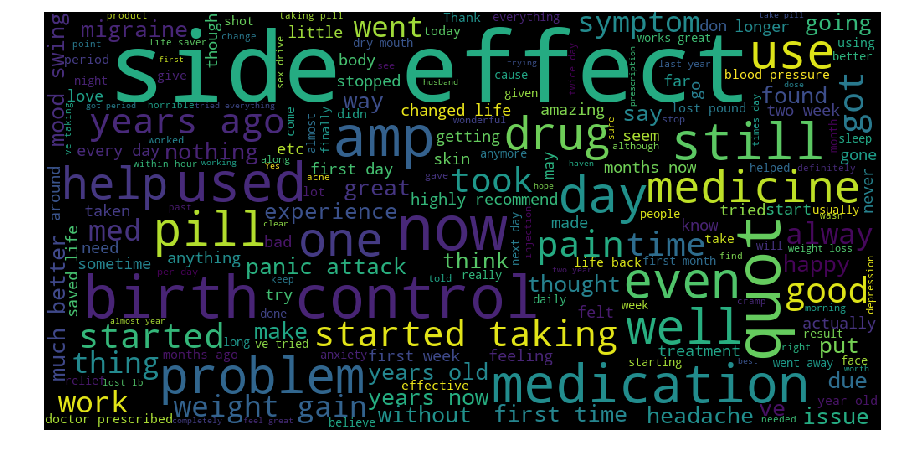

In [25]:
# Create Word Cloud of the reviews with rating equal to 10
rate_ten = data.loc[data.rating == 10, 'review']
k = (''.join(rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

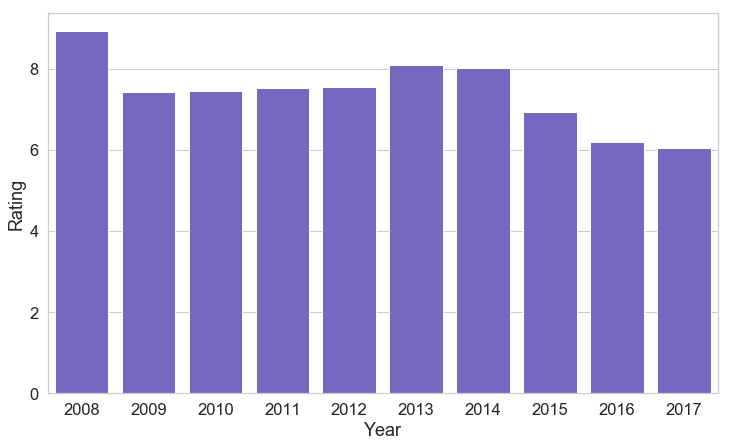

In [26]:
# Create barplot: Find the mean rating per year
mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.5, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

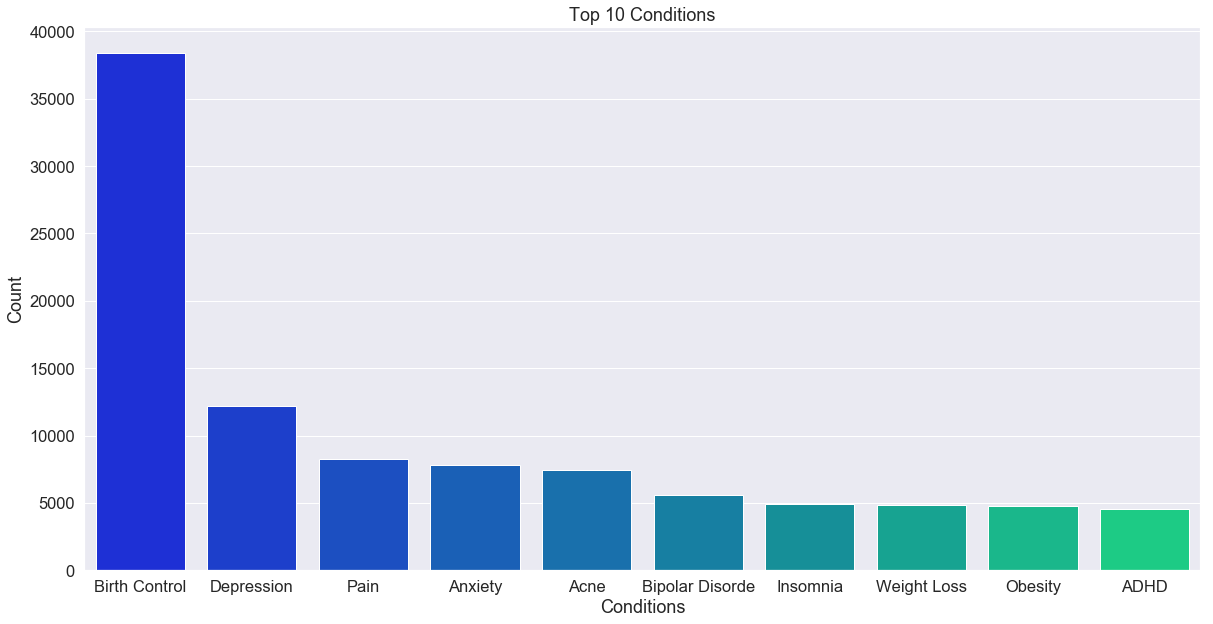

In [27]:
# Create barplot: Top 10 conditions the people are suffering
condition = dict(data['condition'].value_counts())
top_condition = list(condition.keys())[0:10]
values = list(condition.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.5)
plt.rcParams['figure.figsize'] = [20, 10]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 Conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

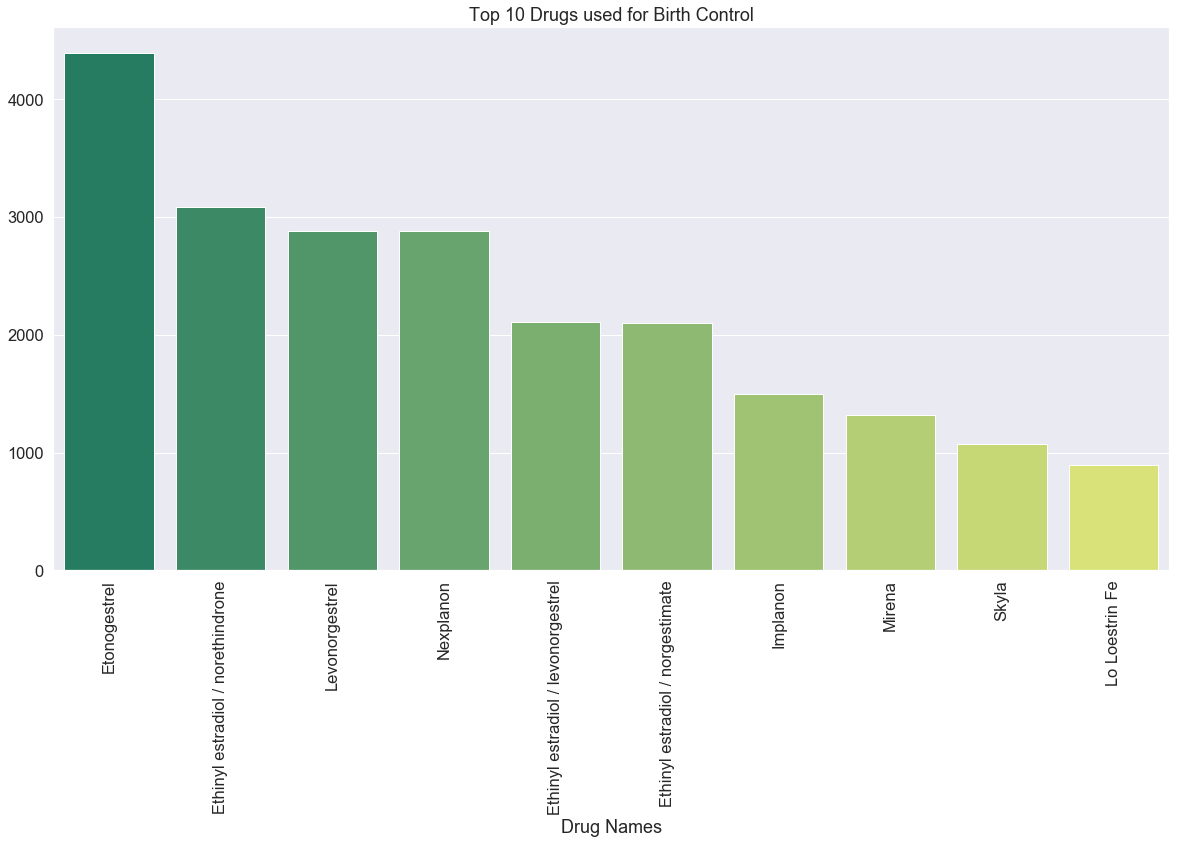

In [28]:
# Create barplot: Top 10 drugs which are used for Birth Control
df = data[data['condition'] == "Birth Control"]['drugname'].value_counts()[0:10]
sns.set(font_scale = 1.5, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

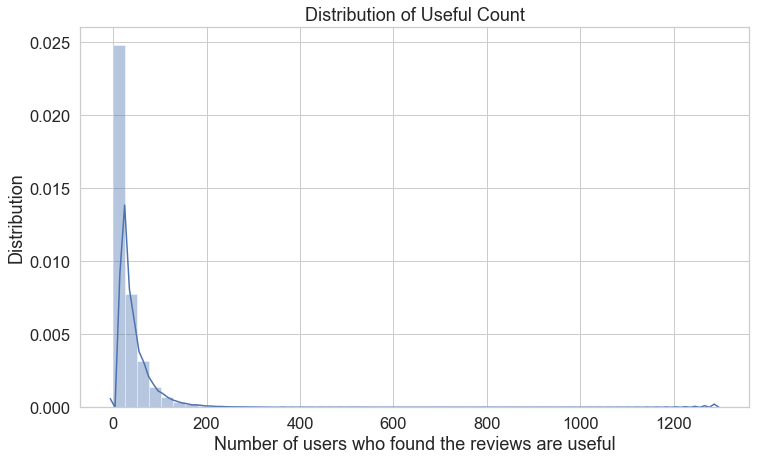

In [29]:
# Distribution of the Useful Count
sns.set(style = 'whitegrid', font_scale = 1.5)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

plt.xlabel('Number of users who found the reviews are useful')
plt.ylabel('Distribution')
plt.title('Distribution of Useful Count')

plt.show()

It looks like there is a strong correlation between rating and number of users who found the reviews are useful.

In [30]:
data["usefulcount"].describe()

count    213869.000000
mean         28.094118
std          36.401377
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulcount, dtype: float64

Based on the distribution of usefulcount, there is a difference of 1,291 between minimum and maximum. The number of deviation is 36, which is high. This simply means the more drugs people look for, the more people read the reviews no matter the contents are good or bad. As a result, the number of usefulcount is very high. Thus, we need to normalize it by conditions, considering people's accesiblity. 

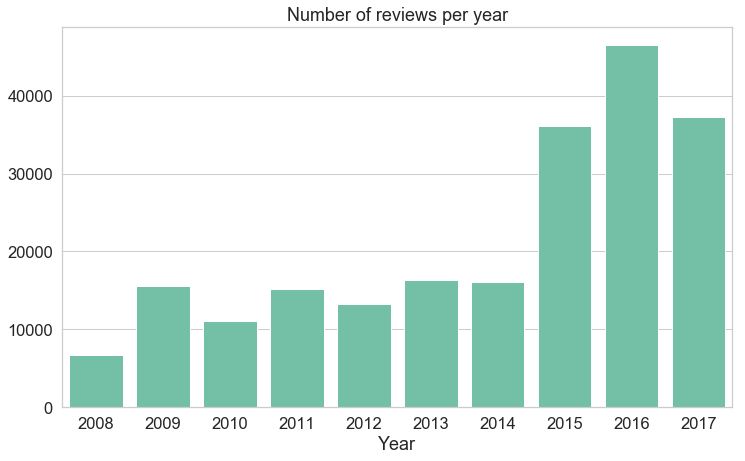

In [31]:
# Create barplot: The number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

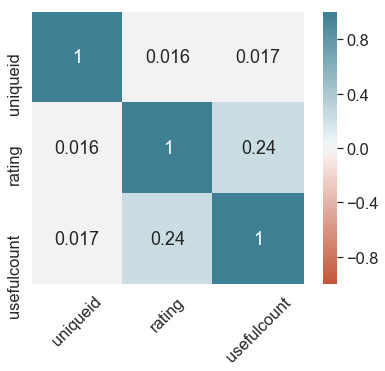

In [32]:
# Heatmap of the Correlation Matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.5)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
                      cmap=sns.diverging_palette(20,220, n=220), 
                       square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [33]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4


In [75]:
# Top 20 Unigrams based on Rating
data['review'] = data['review'].str.replace("I&#039;", "")
data['review'] = data['review'].str.replace(r'[^\w\d\s]', '')

data_review_5 = "".join(data.loc[data.rating <= 5, 'review'])
data_review_10 = "".join(data.loc[data.rating <= 10, 'review'])

# Tokenization
token_review_5 = word_tokenize(data_review_5)
token_review_10 = word_tokenize(data_review_10)

# Unigrams
uni_5 = ngrams(token_review_5, 1)
uni_10 = ngrams(token_review_10, 1)

# Frequency
freq_5 = Counter(uni_5)
freq_10 = Counter(uni_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

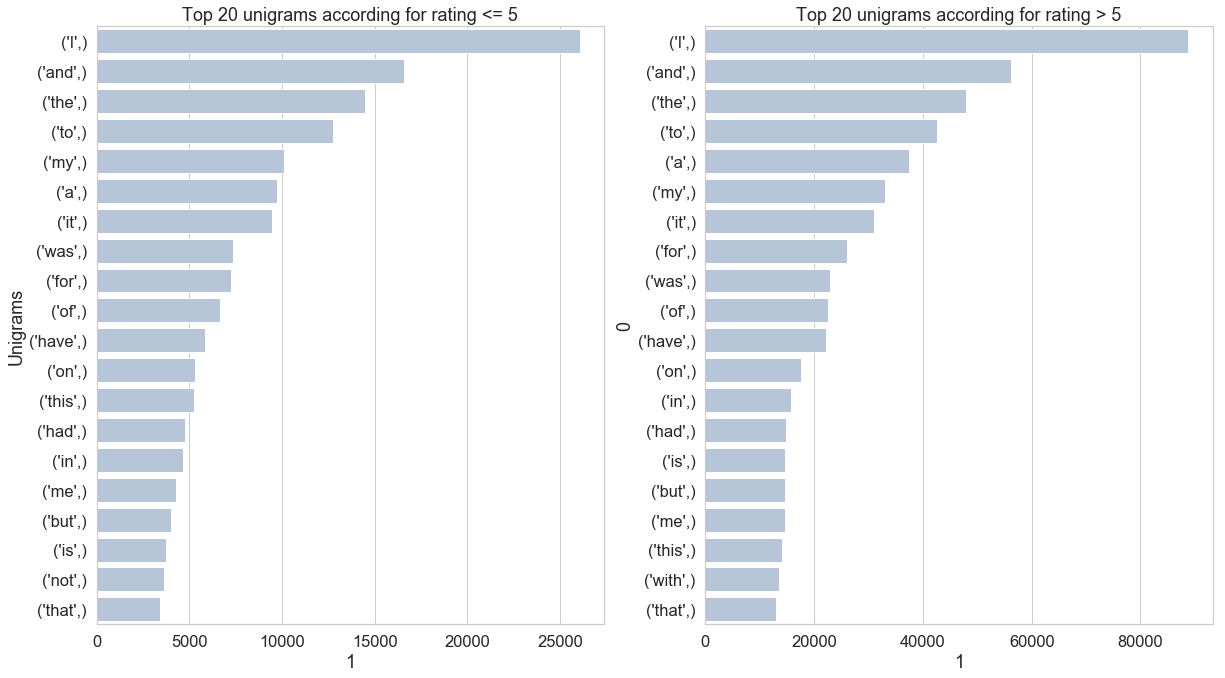

In [76]:
# Create barplot: Top 20 Unigrams
fig, ax = plt.subplots(1,2, figsize=(20,11))
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

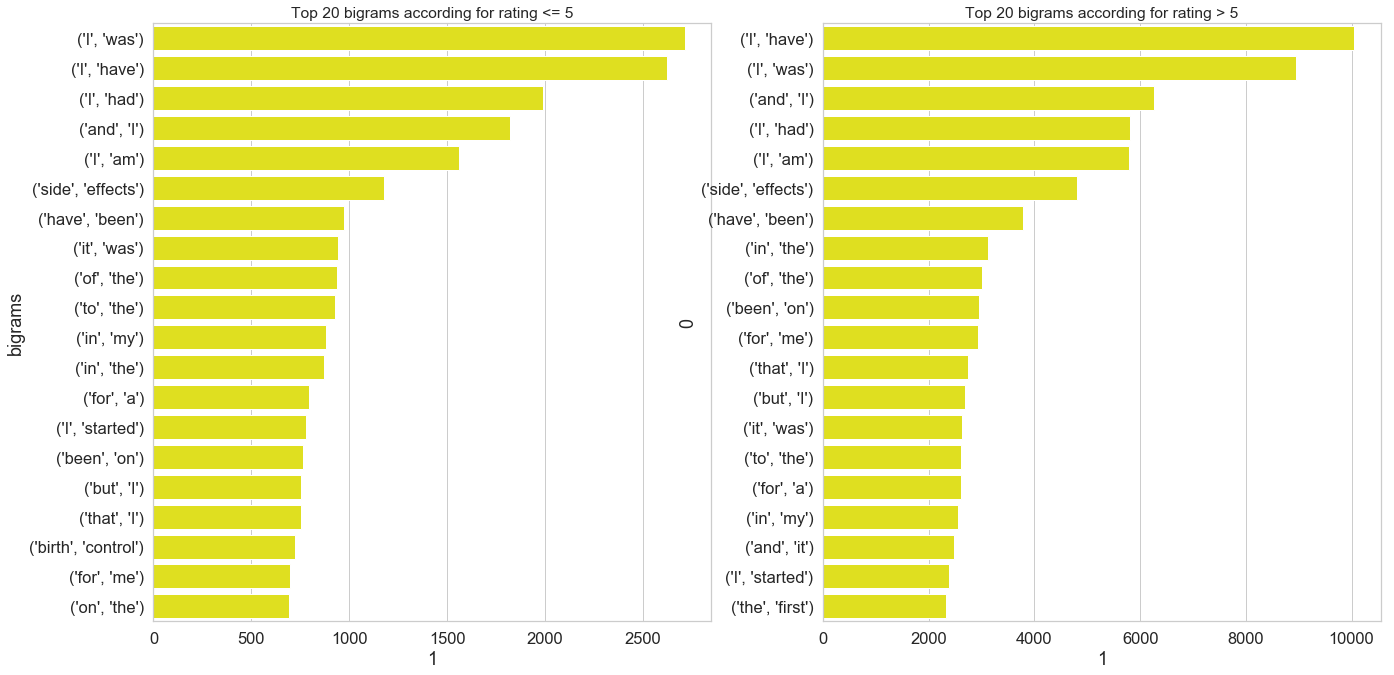

In [77]:
# Top 20 Bigrams based on Rating

bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

freq_5 = Counter(bigrams_5)
freq_10 = Counter(bigrams_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'yellow', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'yellow', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

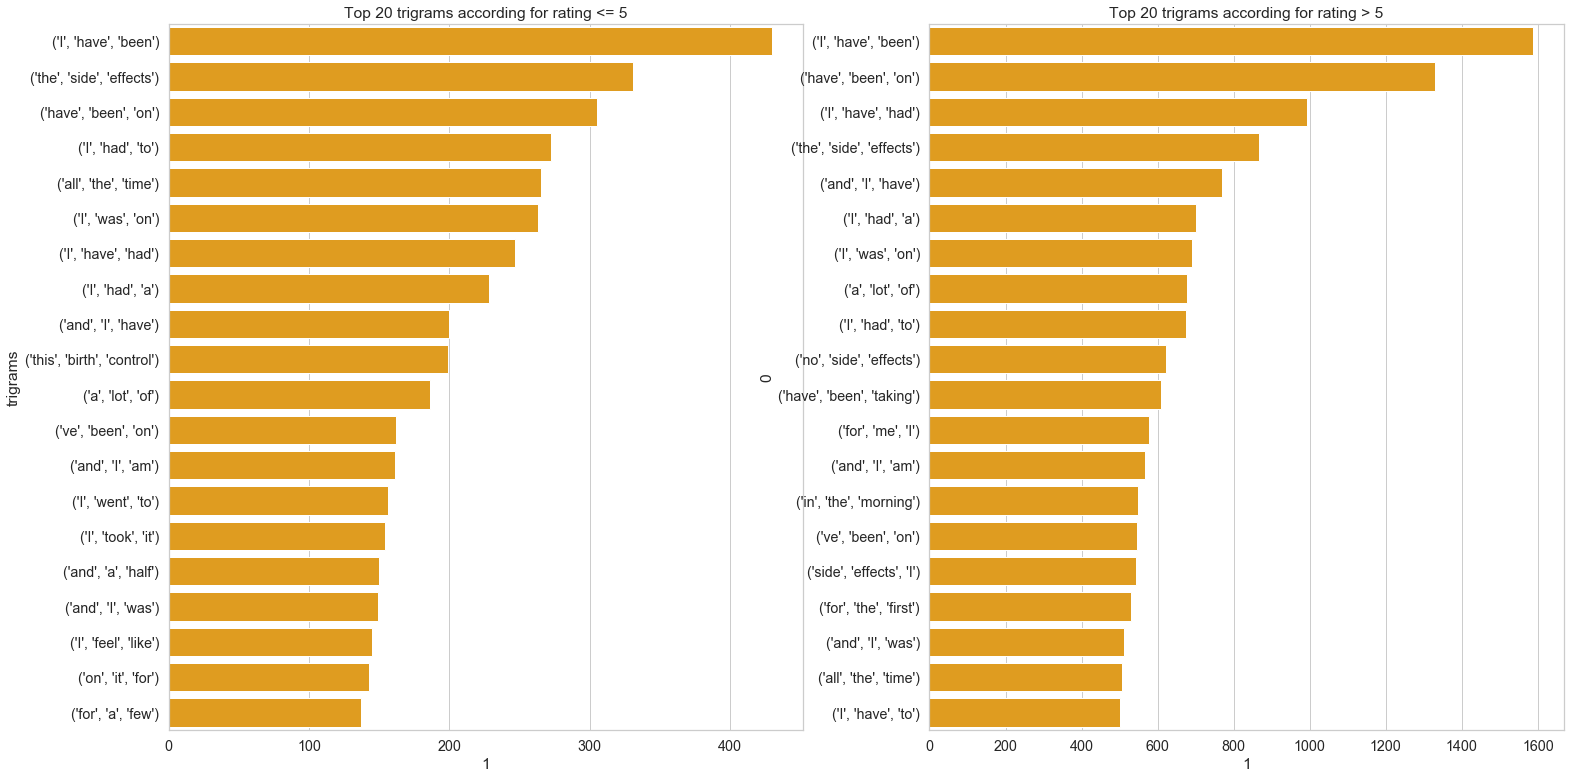

In [78]:
# Top 20 Trigrams according to the rating

trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

freq_5 = Counter(trigrams_5)
freq_10 = Counter(trigrams_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

### Step 3 - Data Preparation <a id='S3'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Removing Stop Words</u><a id='RS'></a>

In [79]:
# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
reviews = data['review'].str.lower()
reviews = reviews.apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
data_review = " ".join(reviews)
tokenize = word_tokenize(data_review)
frequency = Counter(tokenize)

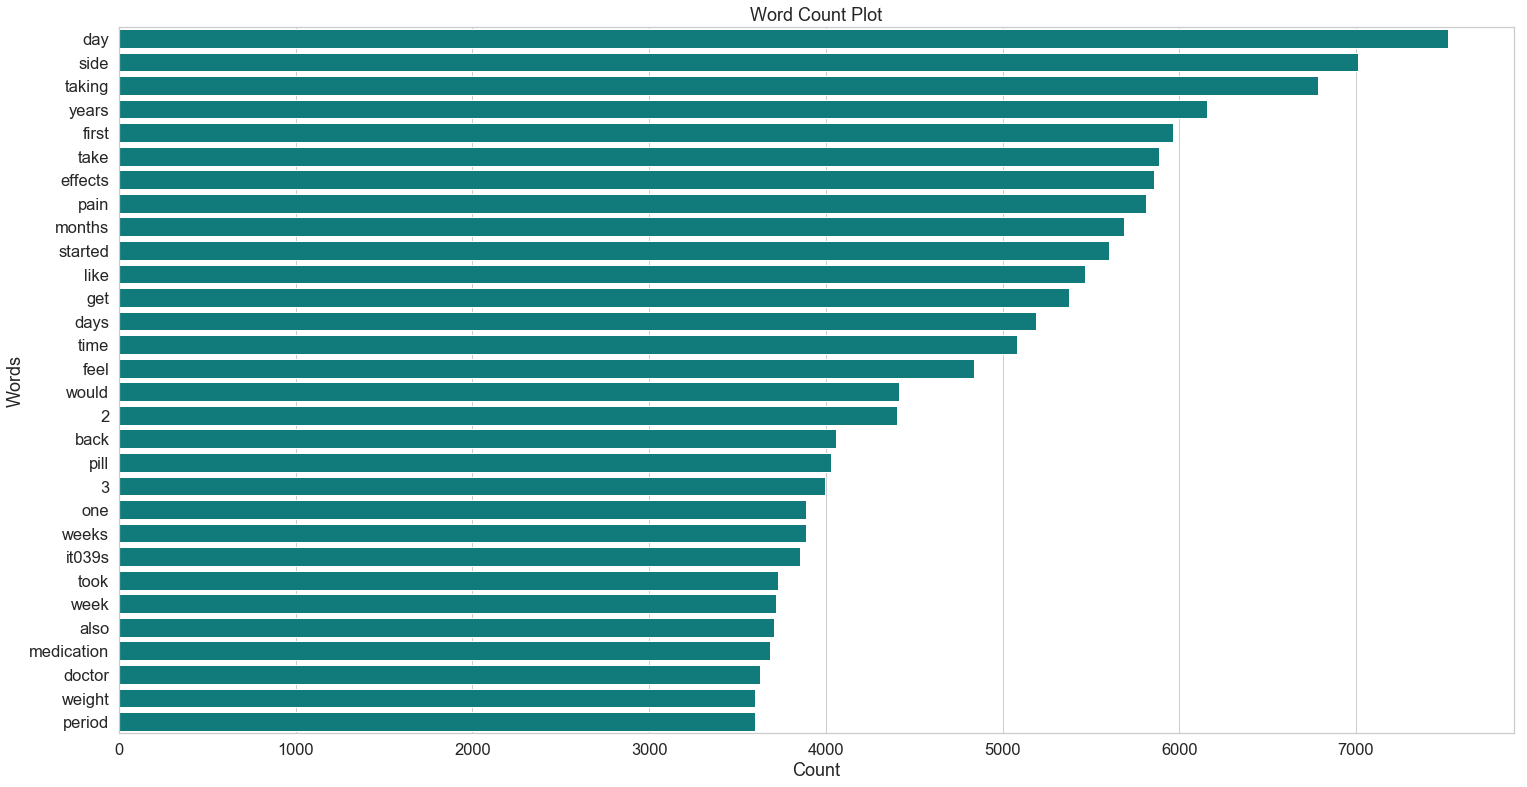

In [80]:
sns.set(font_scale = 1.5, style = 'whitegrid')

# Plotting
most_common = pd.DataFrame(frequency.most_common(30))
word_count = sns.barplot(x = most_common[1], y = most_common[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

Now, let's preprocess the reviews for best polarity and classification.

In [81]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,127685,Phentermine,Weight Loss,I originally started this on January 8 2016 at...,8,2017-04-09,35,1,origin start januari 8 2016 weight 223 lbs end...,70,56,399,0,8,14,68,4.714286
1,59740,NuvaRing,Birth Control,I have had a good experience on this birth con...,10,2017-01-23,3,1,good experi birth control honest terribl take ...,47,40,306,0,6,17,59,5.531915
2,147573,Aviane,Birth Control,Best hormones I ever used I tried Ortho Tricyc...,10,2011-01-20,7,1,best hormon ever use tri ortho tricyclen triph...,36,34,225,0,3,14,21,5.277778
3,179134,Olanzapine,Bipolar Disorde,I gained 10 lbs in under 1 week which sets a s...,1,2017-04-22,9,0,gain 10 lbs 1 week set speed record among weig...,55,48,316,0,4,4,47,4.763636
4,112260,Gabapentin,Neuropathic Pain,I was diagnose with TN Trigeminal Neuroglia a ...,9,2017-02-02,10,1,diagnos tn trigemin neuroglia debilit pain dis...,72,63,440,0,6,14,57,5.125000


In [82]:
# Creating the sentiment based on ratings
data['sentiment_rate'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [83]:
# Cleaning the reviews data
def review_clean(review): 
    
    # changing to lowercase
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multi_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multi_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [84]:
# Applying data['review_clean'] into review
data['review_clean'] = review_clean(data['review'])

In [85]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [86]:
# Removing the word stems using the Snowball Stemmer
snowball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snowball.stem(word) for word in x.split()))

Let's test and check if the reviews are clean...

In [87]:
# Check date format is YYYY-MM-DD
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,127685,Phentermine,Weight Loss,I originally started this on January 8 2016 at...,8,2017-04-09,35,1,origin start januari 8 2016 weight 223 lbs end...,70,56,399,0,8,14,68,4.714286
1,59740,NuvaRing,Birth Control,I have had a good experience on this birth con...,10,2017-01-23,3,1,good experi birth control honest terribl take ...,47,40,306,0,6,17,59,5.531915
2,147573,Aviane,Birth Control,Best hormones I ever used I tried Ortho Tricyc...,10,2011-01-20,7,1,best hormon ever use tri ortho tricyclen triph...,36,34,225,0,3,14,21,5.277778
3,179134,Olanzapine,Bipolar Disorde,I gained 10 lbs in under 1 week which sets a s...,1,2017-04-22,9,0,gain 10 lbs 1 week set speed record among weig...,55,48,316,0,4,4,47,4.763636
4,112260,Gabapentin,Neuropathic Pain,I was diagnose with TN Trigeminal Neuroglia a ...,9,2017-02-02,10,1,diagnos tn trigemin neuroglia debilit pain dis...,72,63,440,0,6,14,57,5.125000


In [88]:
# Applying sentiment polarity to the reviews

def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

Comparing the results above, the correlation shows the uncleaned review with rating has higher score than the cleaned review. I'm curious if applying the Snowball stemmer and not removing the stop words would have better chance in improving the coefficient score results.

It looks like there is no much difference. Now let's check the top 20 patient conditions.

In [89]:
data['condition'].value_counts().head(20)

Birth Control                3732
Depression                   1216
Pain                          834
Anxiety                       770
Acne                          757
Bipolar Disorde               570
Insomnia                      501
Obesity                       496
Weight Loss                   479
ADHD                          461
Emergency Contraception       346
Diabetes, Type 2              340
Vaginal Yeast Infection       340
High Blood Pressure           306
Abnormal Uterine Bleeding     266
Bowel Preparation             257
Smoking Cessation             249
ibromyalgia                   247
Migraine                      239
Anxiety and Stress            229
Name: condition, dtype: int64

In [90]:
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,127685,Phentermine,Weight Loss,I originally started this on January 8 2016 at...,8,2017-04-09,35,1,origin start januari 8 2016 weight 223 lbs end...,70,56,399,0,8,14,68,4.714286
1,59740,NuvaRing,Birth Control,I have had a good experience on this birth con...,10,2017-01-23,3,1,good experi birth control honest terribl take ...,47,40,306,0,6,17,59,5.531915
2,147573,Aviane,Birth Control,Best hormones I ever used I tried Ortho Tricyc...,10,2011-01-20,7,1,best hormon ever use tri ortho tricyclen triph...,36,34,225,0,3,14,21,5.277778
3,179134,Olanzapine,Bipolar Disorde,I gained 10 lbs in under 1 week which sets a s...,1,2017-04-22,9,0,gain 10 lbs 1 week set speed record among weig...,55,48,316,0,4,4,47,4.763636
4,112260,Gabapentin,Neuropathic Pain,I was diagnose with TN Trigeminal Neuroglia a ...,9,2017-02-02,10,1,diagnos tn trigemin neuroglia debilit pain dis...,72,63,440,0,6,14,57,5.125000
5,226439,Etonogestrel,Birth Control,I have had the nexplanon for over a year and i...,9,2015-07-22,7,1,nexplanon year work fabul two chdren want long...,40,38,227,0,4,8,44,4.700000
6,42795,Xulane,Birth Control,Have been on patch for over 16 years First Ort...,9,2017-03-27,7,1,patch 16 year first ortho evra year back zulan...,72,54,406,0,10,18,69,4.652778
7,95700,Efinaconazole,"Onychomycosis, Toenail",Jublia is the only thing that worked for me Ov...,10,2017-11-14,0,1,jublia thing work past 7 year various treatmen...,66,54,387,0,3,11,55,4.878788
8,117507,Nortriptyline,Pain,This medication has greatly improved my qualit...,10,2016-04-12,58,1,medic great improv qualiti life chronic tensio...,41,35,251,0,5,9,35,5.146341
9,18552,Bactroban,Skin and Structure Infection,This cream is causing stinging and burning,1,2011-07-20,46,0,cream caus sting burn,4,4,21,0,0,1,3,4.500000


#### <u>Feature Engineering</u><a id='FE'></a>

In [91]:
# Word count in each review
data['count_word']= data["review_clean"].apply(lambda x: len(str(x).split()))

# Unique word count 
data['count_unique_word']= data["review_clean"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['count_letters']= data["review_clean"].apply(lambda x: len(str(x)))

# Punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# Average length of the words
data["mean_word_len"] = data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [92]:
data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

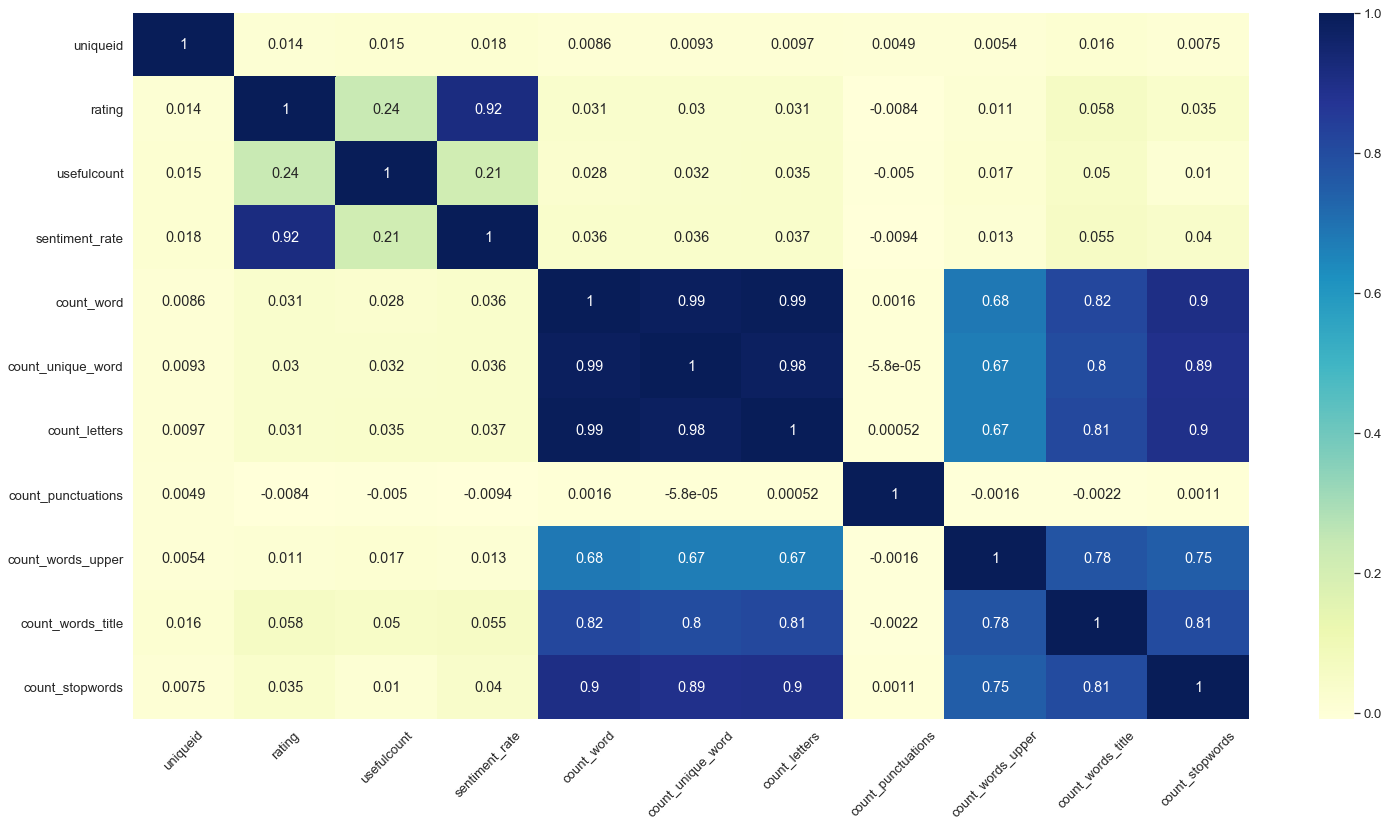

In [93]:
# Heatmap Correlation
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

### Step 4 - Machine Learning Algorithms <a id='S4'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

In [94]:
# Importing Libraries for lightGBM, XGBoost, and CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [95]:
data = data.reset_index(drop=True)

In [96]:
data = data.fillna(0)

In [97]:
# Defining Features and splitting the data into train and test set

features = data[['condition', 'usefulcount', 'count_word', 'count_unique_word', 'count_letters',
                'count_punctuations', 'count_words_upper', 'count_words_title', 'count_stopwords',
                'mean_word_len']]

target = data['sentiment_rate']

features = pd.get_dummies(features, drop_first=True)

In [98]:
X_train, X_test, y_train, y_test, review_train, review_test = train_test_split(features, target, data['review_clean'],
                                                    test_size = 0.3, random_state = 42)
print("The Train set size is ", X_train.shape)
print("The Test set size is ", X_test.shape)

The Train set size is  (14970, 586)
The Test set size is  (6417, 586)


In [99]:
# Vectorizing the Train Datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(min_df=0.01, max_df=.99)
X_train_vect = vect.fit_transform(review_train).toarray()
X_test_vect = vect.transform(review_test).toarray()
print(X_train_vect.shape)

(14970, 638)


In [100]:
# Vectorize the features name
X_train_vect = pd.DataFrame(X_train_vect, index=X_train.index, columns=vect.get_feature_names())
X_test_vect = pd.DataFrame(X_test_vect, index=X_test.index, columns=vect.get_feature_names())

In [101]:
# Make sure it's not overlapping each other
X_train_feature = pd.concat((X_train_vect, X_train), axis=1)
X_test_feature = pd.concat((X_test_vect, X_test), axis=1)

In [102]:
# Remove any null value on feature columns
X_train_feature.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_feature.columns]
X_test_feature.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_feature.columns]

In [103]:
print(X_train_feature.shape, y_train.shape)

(14970, 1224) (14970,)


#### <u>Naive Bayes</u><a id='NB'></a>

In [114]:
from sklearn.naive_bayes import MultinomialNB

# Training Model
nb_clf = MultinomialNB()
nb_clf.fit(X_train_feature, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
#Predictions
nb_pred = nb_clf.predict(X_test_feature)
print("Classification Report", classification_report(y_test, nb_pred))
print("The Accuracy of the model is:", accuracy_score(y_test, nb_pred))

Classification Report               precision    recall  f1-score   support

           0       0.42      0.70      0.52      1947
           1       0.81      0.57      0.67      4470

   micro avg       0.61      0.61      0.61      6417
   macro avg       0.61      0.63      0.60      6417
weighted avg       0.69      0.61      0.63      6417

The Accuracy of the model is: 0.6099423406576282


#### <u>Random Forest</u><a id='RF'></a>

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train_feature, y_train)

rf_predict = rf_clf.predict(X_test_feature)
print("Classification Report", classification_report(y_test, rf_predict))
print("The Accuracy of the model is:", accuracy_score(y_test, rf_predict))

Classification Report               precision    recall  f1-score   support

           0       0.85      0.36      0.51      1947
           1       0.78      0.97      0.86      4470

   micro avg       0.79      0.79      0.79      6417
   macro avg       0.81      0.67      0.69      6417
weighted avg       0.80      0.79      0.76      6417

The Accuracy of the model is: 0.7875954495870344


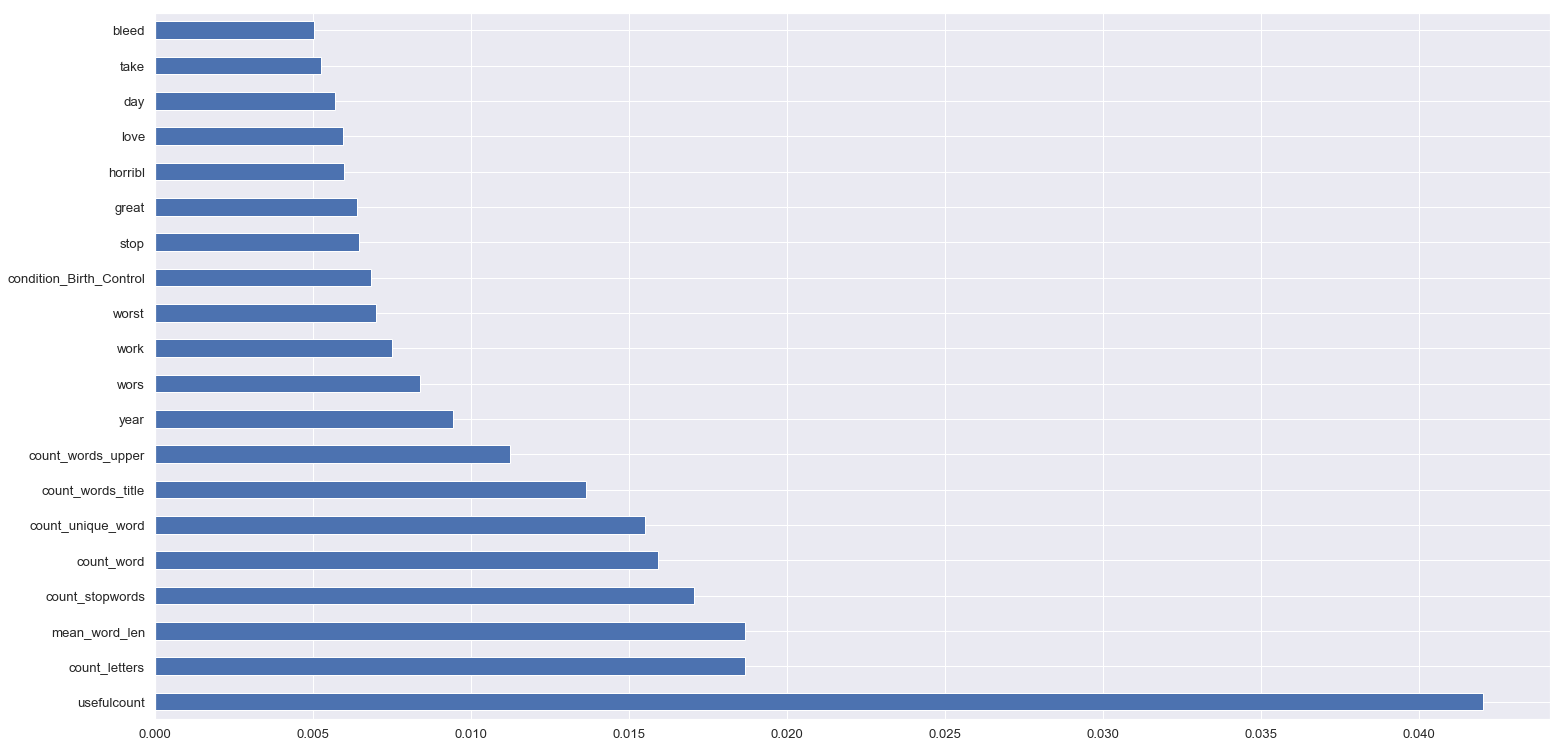

In [108]:
pd.Series(rf_clf.feature_importances_, index=X_train_feature.columns).sort_values(ascending=False).head(20).plot(kind='barh')

#### <u>LightGBM</u><a id='LGB'></a>

Light GBM is a gradient boosting framework that based on decision tree algorithm, usually used for ranking and classification.

In [109]:
gbm_clf = LGBMClassifier(
        n_estimator=1000, 
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9, 
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1)

gbm_model = gbm_clf.fit(X_train_feature, y_train)

In [110]:
# Training Model
gbm_clf = LGBMClassifier(
        n_estimator=1000, 
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9, 
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1)

gbm_model = gbm_clf.fit(X_train_feature, y_train)

# Predictions
gbm_pred = gbm_model.predict(X_test_feature)
print("Classification Report:", classification_report(y_test, gbm_pred))
print("The Accuracy of the model is: ", accuracy_score(y_test, gbm_pred))
print("The Confusion Matrix is ")
confusion_matrix(y_test, gbm_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.74      0.47      0.58      1947
           1       0.80      0.93      0.86      4470

   micro avg       0.79      0.79      0.79      6417
   macro avg       0.77      0.70      0.72      6417
weighted avg       0.78      0.79      0.77      6417

The Accuracy of the model is:  0.7896213183730715
The Confusion Matrix is 


array([[ 915, 1032],
       [ 318, 4152]], dtype=int64)

The confusion matrix tells us that (TP) every 8210 patients are satisfied with the recommended drugs and are predicted satisified; (TN) 3816 patients are satisfied with the recommended drugs but predicted as dissatisfied. Whereas, (FP) 11135 patients are dissatified with the recommended drugs and are predicted satisfied; (FN) 41000 patients are dissatisfied with the recommended drugs but predicted as dissatisfied. 

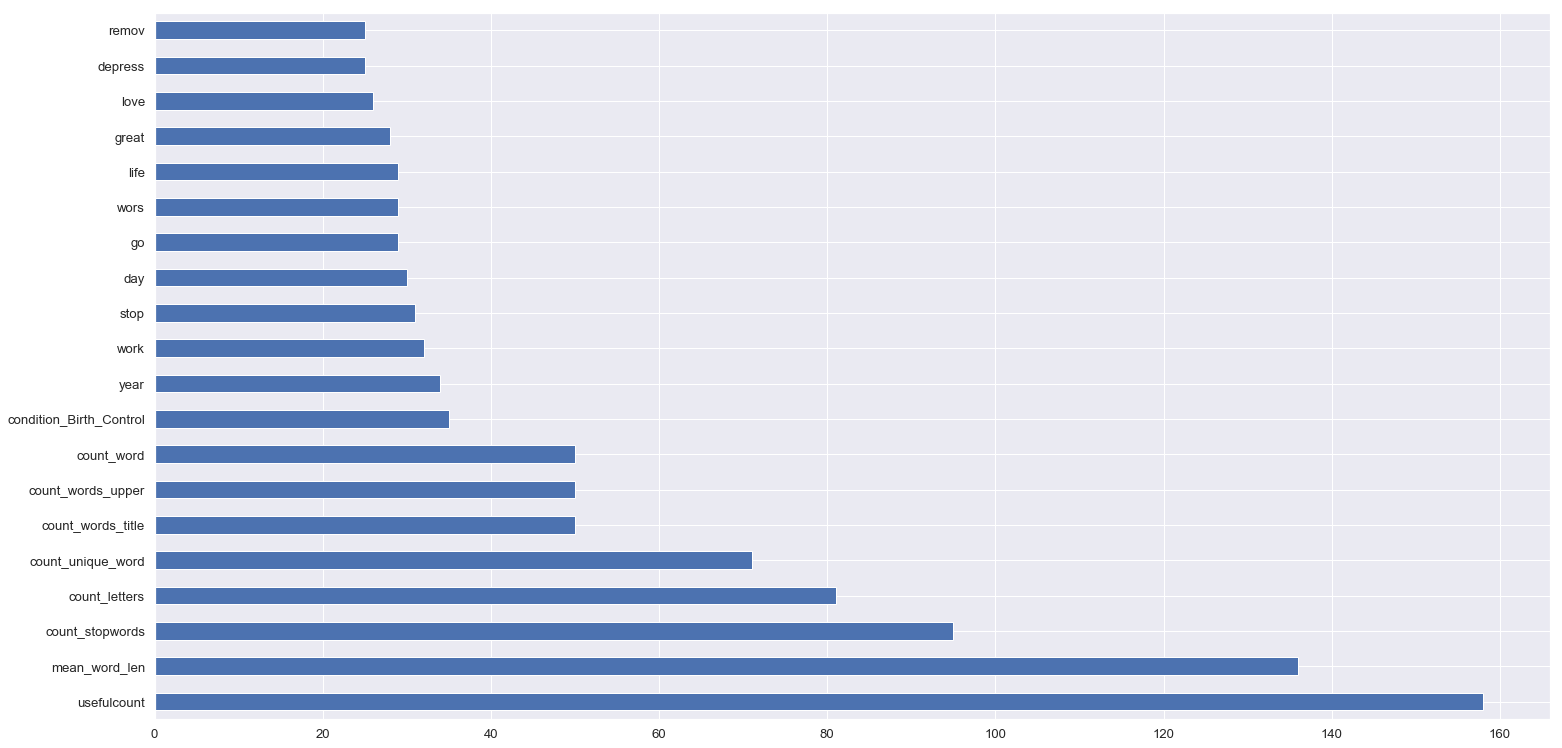

In [111]:
#Feature Importance Plot using LGBM
pd.Series(gbm_model.feature_importances_, index=X_train_feature.columns).sort_values(ascending=False).head(20).plot(kind='barh')

#### <u>XGBoost</u><a id='XGB'></a>

In [116]:
#Training Model
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator=1000,
                       learning_rate=0.10,
                       num_leaves=30)

xgb_model = xgb_clf.fit(X_train_feature, y_train)

#Predictions
xgb_pred = xgb_model.predict(X_test_feature)
print("Classification Report:", classification_report(y_test, xgb_pred))
print("The Accuracy of the model is: ", accuracy_score(y_test, xgb_pred))
print("The confusion matrix is ")
confusion_matrix(y_test, xgb_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.74      0.45      0.56      1947
           1       0.80      0.93      0.86      4470

   micro avg       0.79      0.79      0.79      6417
   macro avg       0.77      0.69      0.71      6417
weighted avg       0.78      0.79      0.77      6417

The Accuracy of the model is:  0.7865045971637837
The confusion matrix is 


array([[ 878, 1069],
       [ 301, 4169]], dtype=int64)

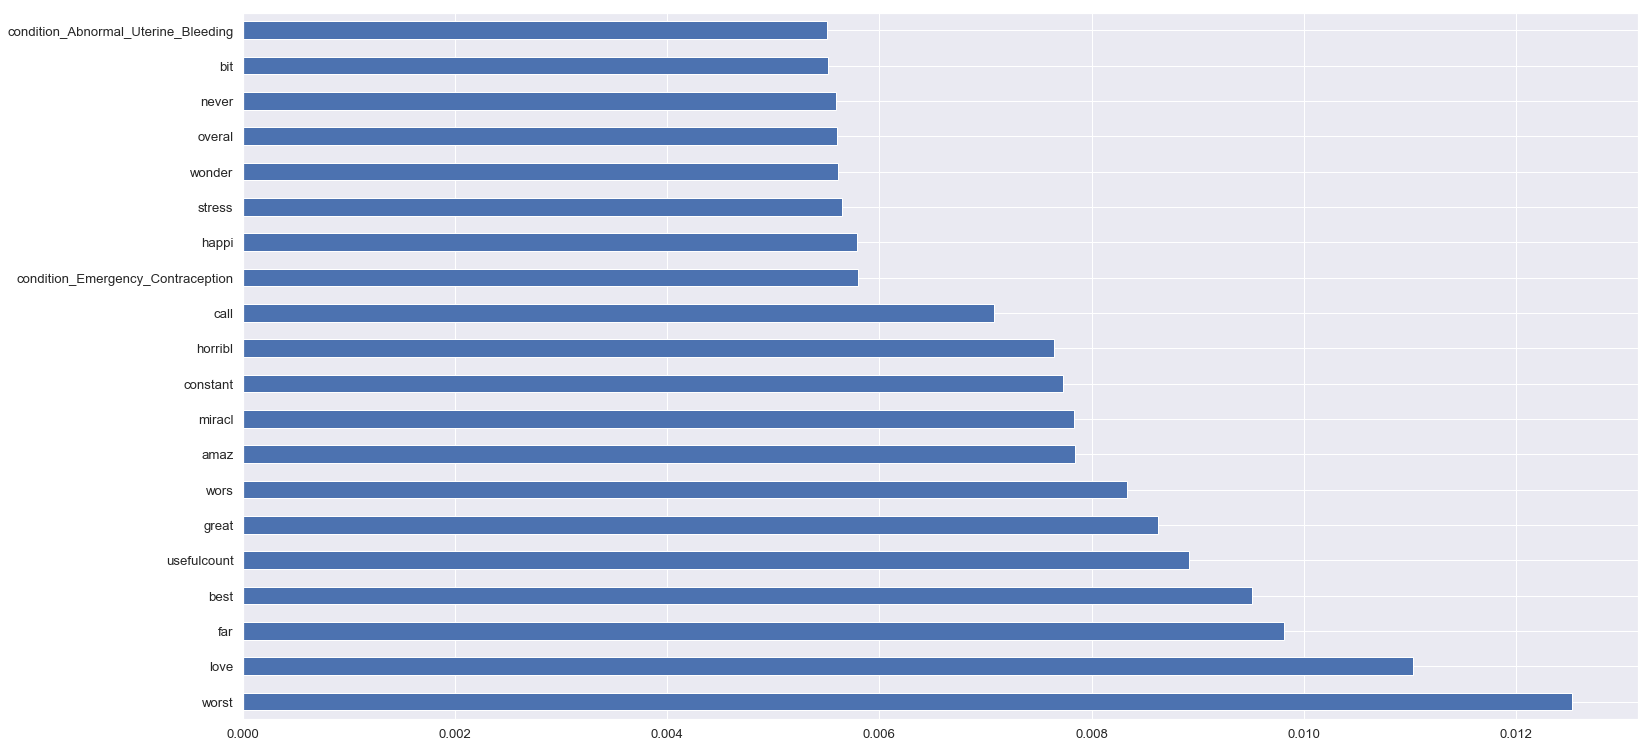

In [113]:
#Feature Imporance Plot using XGBClassifier
pd.Series(xgb_model.feature_importances_, index=X_train_feature.columns).sort_values(ascending=False).head(20).plot(kind='barh')

#### <u>CatBoostClassifier</u><a id='CBC'></a>

In [117]:
#Training Model
cb_clf = CatBoostClassifier(iterations=1000,
                           learning_rate=0.5)

cb_model = cb_clf.fit(X_train_feature, y_train)

#Predictions
cb_pred = cb_model.predict(X_test_feature)
print("Classification Report:", classification_report(y_test, cb_pred))
print("The Accuracy of the model is: ", accuracy_score(y_test, cb_pred))
print("The confusion matrix is")
confusion_matrix(y_test, cb_pred)

0:	learn: 0.5996025	total: 20.8ms	remaining: 20.7s
1:	learn: 0.5635785	total: 40ms	remaining: 20s
2:	learn: 0.5375584	total: 60.8ms	remaining: 20.2s
3:	learn: 0.5227609	total: 81.2ms	remaining: 20.2s
4:	learn: 0.5147587	total: 99.2ms	remaining: 19.7s
5:	learn: 0.5051061	total: 118ms	remaining: 19.6s
6:	learn: 0.5001742	total: 140ms	remaining: 19.8s
7:	learn: 0.4941755	total: 159ms	remaining: 19.7s
8:	learn: 0.4882920	total: 178ms	remaining: 19.6s
9:	learn: 0.4831351	total: 195ms	remaining: 19.3s
10:	learn: 0.4785176	total: 211ms	remaining: 19s
11:	learn: 0.4741610	total: 231ms	remaining: 19s
12:	learn: 0.4717601	total: 247ms	remaining: 18.8s
13:	learn: 0.4674272	total: 283ms	remaining: 19.9s
14:	learn: 0.4640300	total: 303ms	remaining: 19.9s
15:	learn: 0.4611996	total: 323ms	remaining: 19.8s
16:	learn: 0.4578422	total: 341ms	remaining: 19.7s
17:	learn: 0.4541005	total: 357ms	remaining: 19.5s
18:	learn: 0.4507596	total: 374ms	remaining: 19.3s
19:	learn: 0.4465273	total: 392ms	remaining:

array([[1188,  759],
       [ 495, 3975]], dtype=int64)

### Step 5 - Evaluation <a id='S5'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

The end goal of this sentiment analysis is to be able to recommend the suitable medicine to treat the patient's conditin based on their reviews. Throughout the three major processes: exploration, preparation, and modeling, I have been able to reveal interesting findings using visualization techniques and statistical techniques. I applied n-grams that represent the patient's emotions, and the relationship with date and rating. Next, I used stopwords to filter out unuseful data such as "the", "an", "a", "am", "in", and etc. Yet, adding the dummy variable This is very important step to do before I projected the data into modeling as it may improves the overall scores. 

Based on the three machine learning algorithm models, it appears that CatBoostClassifier has the highest accuracy score of 80.44%. In other words, we can predict 80.44% whether a patient is satisfied with the drug that has been recommended. Interestingly, LightGBM and XGBoost share similar accuracy score of 76% --even though XGBoost is slightly higher by 0.16%. LightGBM and XGBoost share similar criteria of feature importance such as condition, year, useful count, mean_word_len, and sentiment. Condition takes the first place in both models; followed by the average word of patients' review (mean_word_len) come up the second in XGBoost and number of users who found the reviews are useful (usefulcount) in LightGBM. These processes have allowed me to calculate the final predicted value and recommend the appropriate drug for each condition based on the order of the value (feature importance).

Revision has been made due to my curiousity in order to produce a better score model. I have decided to add Naive Bayes and Random Forest. Indeed, RF is popular in text mining --the fact the capability to achieve higher score. I've successfully added CountVectorizer and TfidfVectorizer. CountVectorizer is used to count the number of words (term frequency), while TfidfVectorizer is used to weight the number of words. Lastly, adding dummy is crucial because we want to run NB and RF.

In comparison the previous model, CatBoostClassifier still holds the highest results; however, we can't really count this model since we do not have much categories (but it is still good to know!). NB has the lowest accuracy score of 61%; while, RF, LightGBM, XGB